Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

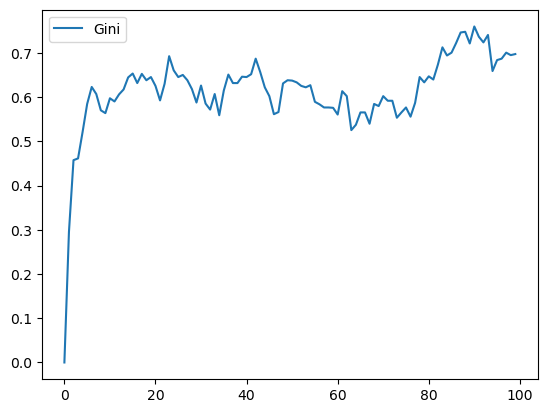

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sample import *

model = MoneyModel(50, 10, 10)
for i in range(100):
  model.step()

gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()



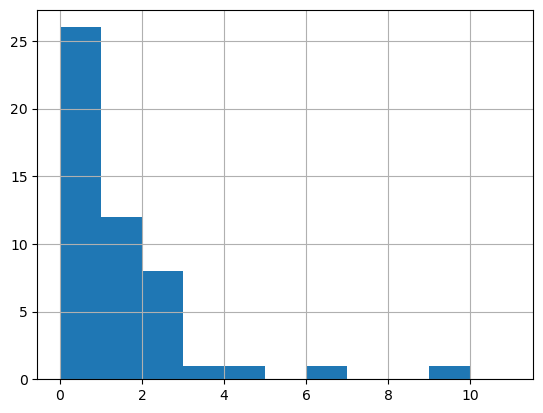

In [2]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

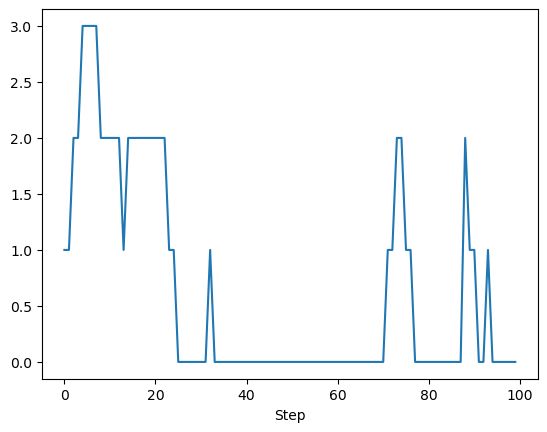

In [3]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [4]:
params = {"N": range(10, 500, 10), "width": 10, "height": 10}

results = mesa.batch_run(
  MoneyModel,
  parameters=params,
  iterations=2,
  max_steps=25,
  number_processes=1,
  data_collection_period=1,
  display_progress=True
)

  0%|          | 0/98 [00:00<?, ?it/s]

100%|██████████| 98/98 [00:06<00:00, 15.86it/s]


In [5]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())
results_df.head()

Index(['RunId', 'iteration', 'Step', 'N', 'width', 'height', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


,RunId,iteration,Step,N,width,height,Gini,AgentID,Wealth
0,0,0,0,10,10,10,0.0,0,1
1,0,0,0,10,10,10,0.0,1,1
2,0,0,0,10,10,10,0.0,2,1
3,0,0,0,10,10,10,0.0,3,1
4,0,0,0,10,10,10,0.0,4,1


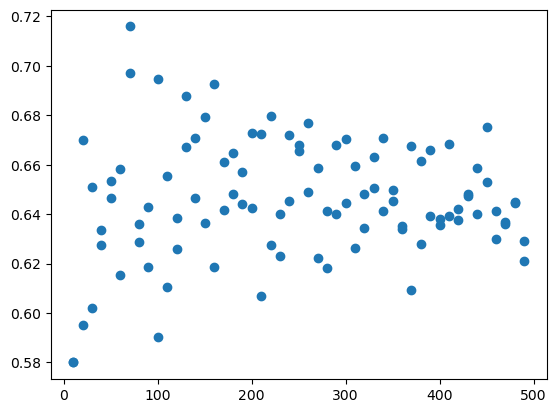

In [8]:
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 25)]
N_values = results_filtered.N.values
gini_values = results_filtered.Gini.values
plt.scatter(N_values, gini_values)